# Downloading data from the link(Question 5)

This code is same as the code in question 5. Scroll down for insights

In [2]:
import requests
import pandas as pd
import re

def download_data(api_link):
    response = requests.get(api_link)
    data = response.json()
    return data

def extract_data(data):
    show_name = data['name']
    episodes = data['_embedded']['episodes']

    formatted_data = []
    for episode in episodes:
        episode_data = {
            'id': episode['id'],
            'url': episode['url'],
            'name': episode['name'],
            'season': episode['season'],
            'number': episode['number'],
            'type': episode['type'],
            'airdate': episode['airdate'],
            'airtime': episode['airtime'],
            'runtime': episode['runtime'],
            'average rating': episode['rating']['average'],
            'summary': re.sub('<[^<]+?>', '', episode['summary']),  # Remove HTML tags from summary
            'medium image link': episode['image']['medium'],
            'original image link': episode['image']['original']
        }
        
        formatted_data.append(episode_data)
    
    return show_name, formatted_data

# Example usage
api_link = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Download data from API
data = download_data(api_link)

# Extract required data
show_name, formatted_data = extract_data(data)

# Display the extracted data
df = pd.DataFrame(formatted_data)
df

,id,url,name,season,number,type,airdate,airtime,runtime,average rating,summary,medium image link,original image link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
5,932057,https://www.tvmaze.com/episodes/932057/westwor...,The Adversary,1,6,regular,2016-11-06,21:00,60,8.0,"While Maeve convinces Felix to show her ""upsta...",https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
6,938404,https://www.tvmaze.com/episodes/938404/westwor...,Trompe L'Oeil,1,7,regular,2016-11-13,21:00,60,8.6,While William and Dolores travel to the unclai...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
7,943065,https://www.tvmaze.com/episodes/943065/westwor...,Trace Decay,1,8,regular,2016-11-20,21:00,60,7.9,Bernard tries to cope with what he did under R...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
8,943066,https://www.tvmaze.com/episodes/943066/westwor...,The Well-Tempered Clavier,1,9,regular,2016-11-27,21:00,60,8.5,Bernard forces Robert to take him back into hi...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,21:00,90,8.7,Delores finds out the truth about William's fa...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


# Drawing Insights

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   36 non-null     int64  
 1   url                  36 non-null     object 
 2   name                 36 non-null     object 
 3   season               36 non-null     int64  
 4   number               36 non-null     int64  
 5   type                 36 non-null     object 
 6   airdate              36 non-null     object 
 7   airtime              36 non-null     object 
 8   runtime              36 non-null     int64  
 9   average rating       36 non-null     float64
 10  summary              36 non-null     object 
 11  medium image link    36 non-null     object 
 12  original image link  36 non-null     object 
dtypes: float64(1), int64(4), object(8)
memory usage: 3.8+ KB


In [6]:
# Convert 'airdate' column to datetime format
df['airdate'] = pd.to_datetime(df['airdate'])

**overall ratings for each season and using plots compare the ratings for all the
seasons**: 👇👇👇

In [8]:
#Get all the overall ratings for each season
season_ratings = df.groupby('season')['average rating'].mean()
season_ratings

season
1    8.0900
2    8.0000
3    7.7750
4    7.5375
Name: average rating, dtype: float64

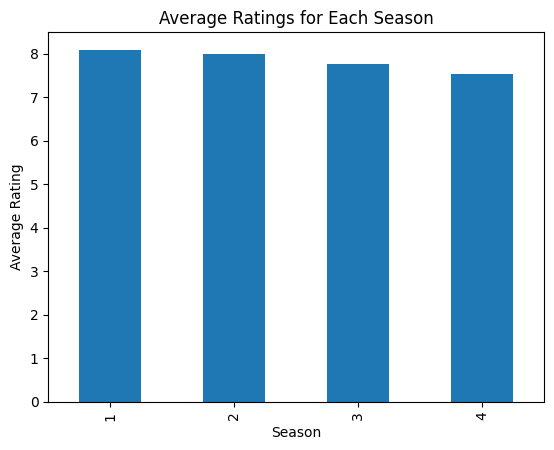

In [9]:
# Compare ratings for all the seasons using a bar plot
import matplotlib.pyplot as plt
season_ratings.plot(kind='bar', xlabel='Season', ylabel='Average Rating', title='Average Ratings for Each Season')
plt.show()

**episodes whose average rating is more than 8 for every season**👇👇👇

In [13]:

# Get all the episode names with average rating more than 8 for every season
high_rated_episodes = df[df['average rating'] > 8]['name']
high_rated_episodes

6                 Trompe L'Oeil
8     The Well-Tempered Clavier
9            The Bicameral Mind
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

**episode names that aired before May 2019**👇👇👇

In [15]:
# Get all the episode names that aired before May 2019
episodes_before_may_2019 = df[df['airdate'] < pd.Timestamp(2019, 5, 1)]['name']
episodes_before_may_2019

0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorchés
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

**episode name from each season with the highest and lowest rating**👇👇👇

In [16]:
# Get the episode name from each season with the highest rating
highest_rated_episodes = df.groupby('season').apply(lambda x: x.loc[x['average rating'].idxmax(), 'name'])

highest_rated_episodes

season
1    The Bicameral Mind
2               Kiksuya
3          Parce Domine
4              Zhuangzi
dtype: object

In [17]:
# Get the episode name from each season with the lowest rating
lowest_rated_episodes = df.groupby('season').apply(lambda x: x.loc[x['average rating'].idxmin(), 'name'])
lowest_rated_episodes

season
1       The Stray
2    Akane No Mai
3     Decoherence
4    The Auguries
dtype: object

**summary for the most popular ( ratings ) episode in every season**: 👇👇👇

In [18]:
# Get the summary for the most popular (highest rated) episode in every season
most_popular_summary = df.groupby('season').apply(lambda x: x.loc[x['average rating'].idxmax(), 'summary'])
most_popular_summary

season
1    Delores finds out the truth about William's fa...
2    Another of Westworld's Host revolutionaries is...
3    If you're stuck in a loop, try walking in a st...
4                                        God is bored.
dtype: object